# RANK Tutorial

Let us dive a bit deeper into the functionalities of the package by looking at a nonlinear medium scale DSGE model in the style of Smets & Wouters (2003,2007). The model features Rothemberg instead of Calvo pricing, the zero-lower bound on the nominal interest rate, and downwards nominal wage rigidity. The full model specification can be found in the appendix of the [original paper](https://gregorboehl.com/live/hank_speed_boehl.pdf).

Start with some misc imports and load the package. The rest of these tutorials rely on the ``grgrlib`` for plotting, which can be installed via the official repositories ("``pip install grgrlib``").

In [1]:
import jax.numpy as jnp # use jax.numpy instead of normal numpy
from grgrlib import grplot # nice backend for batch plotting with matplotlib
import econpizza as ep # pizza
import matplotlib.pyplot as plt

# for nicer text in figures
plt.rc('text', usetex=True)
# only necessary if you run this in a jupyter notebook:
%matplotlib inline 

The YAML file, together with a few other examples, is provided with the package and can be found [in this folder](https://github.com/gboehl/econpizza/tree/master/econpizza/examples).

These examples can be imported via the ``econpizza.examples`` module.

In [2]:
# the path to the example YAML 
example_dsge = ep.examples.dsge

This is nothing else than the local path to the YAML file:

In [3]:
print(example_dsge)

/home/gboehl/github/econpizza/econpizza/examples/dsge.yml


Let us make use of the functionality to parse the model before loading it, so that we can adjust it manually. This is especially useful if we want to loop over different parameter values.

In [4]:
model_dict = ep.parse(example_dsge)
model_dict.keys()

dict_keys(['name', 'description', 'variables', 'parameters', 'shocks', 'equations', 'steady_state', 'path', 'vars'])

``model_dict`` now contains all information on the model. Let's, for example, change the sensitivity of the monetary policy rule w.r.t. inflation, and then load the model. Note that I'm loading ``model_dict`` instead of the path to the YAML. `ep.load` would accept both as input, but of course only ``model_dict`` contains the changed parameter value

In [5]:
model_dict['steady_state']['fixed_values']['phi_pi'] = 2.
# load the model
mod = ep.load(model_dict)
type(mod)

(load:) Parsing done.


econpizza.__init__.PizzaModel

``mod`` is now an instance of the class ``PizzaModel``, which is the generic model class. Note that this still contains the original dictionary together with some compiled information:

In [6]:
mod.keys()

dict_keys(['name', 'description', 'variables', 'parameters', 'shocks', 'equations', 'steady_state', 'path', 'vars', 'context', 'cache', 'func_strings'])

Lets find the steady state.

In [7]:
_ = mod.solve_stst()

    Iteration   1 | max. error 1.90e+00 | lapsed 1.5861
    Iteration   2 | max. error 2.31e+00 | lapsed 1.6636
    Iteration   3 | max. error 9.71e-01 | lapsed 1.6644
    Iteration   4 | max. error 1.13e-01 | lapsed 1.6650
    Iteration   5 | max. error 4.88e-02 | lapsed 1.6656
    Iteration   6 | max. error 1.79e-02 | lapsed 1.6662
    Iteration   7 | max. error 4.54e-03 | lapsed 1.6668
    Iteration   8 | max. error 4.67e-04 | lapsed 1.6674
    Iteration   9 | max. error 6.07e-06 | lapsed 1.6680
(solve_stst:) Steady state found (1.9064s). The solution converged.


Note that this gets cached and will not be re-evaluated if called again

In [8]:
_ = mod.solve_stst()

(solve_stst:) Steady state already known.


...but you could change a parameter or steady state value and reevaluate again:

In [9]:
model_dict['steady_state']['fixed_values']['sigma_c'] = 1.5
# load the model
mod = ep.load(model_dict)
newton_dict = mod.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 1.90e+00 | lapsed 1.4342
    Iteration   2 | max. error 2.31e+00 | lapsed 1.4352
    Iteration   3 | max. error 9.71e-01 | lapsed 1.4358
    Iteration   4 | max. error 1.13e-01 | lapsed 1.4365
    Iteration   5 | max. error 4.88e-02 | lapsed 1.4371
    Iteration   6 | max. error 1.79e-02 | lapsed 1.4377
    Iteration   7 | max. error 4.54e-03 | lapsed 1.4383
    Iteration   8 | max. error 4.67e-04 | lapsed 1.4389
    Iteration   9 | max. error 6.07e-06 | lapsed 1.4395
(solve_stst:) Steady state found (1.5254s). The solution converged.


Also note that this was much faster thant the first run above, because the function ``solve_stst()`` is now cached. This makes it much faster to try out different steady state values. The object ``newton_dict``contains the results from Newton-based root finding, which may be interesting for debugging (you must use the ``raise_errors=False`` flag to avoid raising an error and to get the dictionary):

In [10]:
model_dict_broken = ep.copy(model_dict) # ep.copy is an alias for deepcopy
model_dict_broken['steady_state']['fixed_values']['mc'] = 200. # so wrong!
# load the model
mod = ep.load(model_dict_broken)
newton_dict = mod.solve_stst(raise_errors=False)

(load:) Loading cached model.
    Iteration   1 | max. error 1.20e+03 | lapsed 0.0004
    Iteration   2 | max. error 1.20e+03 | lapsed 0.0011
    Iteration   3 | max. error 1.20e+03 | lapsed 0.0016
    Iteration   4 | max. error 1.20e+03 | lapsed 0.0022
    Iteration   5 | max. error 1.20e+03 | lapsed 0.0027
    Iteration   6 | max. error 1.26e+03 | lapsed 0.0033
    Iteration   7 | max. error 1.89e+04 | lapsed 0.0038
    Iteration   8 | max. error 2.38e+04 | lapsed 0.0044
    Iteration   9 | max. error 1.20e+03 | lapsed 0.0049
    Iteration  10 | max. error 1.20e+03 | lapsed 0.0055
    Iteration  11 | max. error 1.20e+03 | lapsed 0.0060
    Iteration  12 | max. error 1.20e+03 | lapsed 0.0066
    Iteration  13 | max. error 1.20e+03 | lapsed 0.0071
    Iteration  14 | max. error 1.20e+03 | lapsed 0.0076
(solve_stst:) Steady state FAILED (max. error is 1.20e+03 in eqn. 13). Maximum number of 15 iterations reached. 


This failed because marginal costs are a function of the values of ``theta``. While in this case the reason is clear, in other cases you could have a look at the Newton dictionary to debug this:

In [11]:
print(newton_dict.keys())

dict_keys(['success', 'message', 'x', 'niter', 'fun', 'jac', 'det', 'initial_values'])


Let us better return to the working model. The model has many shocks. We'll go for a risk premium shock, ``e_u``.

In [12]:
mod = ep.load(model_dict)
_ = mod.solve_stst()
print(mod['shocks'])

# shock the risk premium
shk = ('e_u', .01)

(load:) Loading cached model.
(solve_stst:) Steady state already known.
['e_beta', 'e_z', 'e_g', 'e_p', 'e_w', 'e_i', 'e_r', 'e_u']


Simulation works as before...

In [13]:
# find the nonlinear trajectory
x, flag = mod.find_path(shock=shk)

    Iteration   1 | max error 2.24e+00 | lapsed 2.3029s
    Iteration   2 | max error 7.13e-02 | lapsed 2.3286s
    Iteration   3 | max error 3.33e-02 | lapsed 2.3434s
    Iteration   4 | max error 3.10e-02 | lapsed 2.3574s
    Iteration   5 | max error 2.39e-02 | lapsed 2.3715s
    Iteration   6 | max error 1.37e-02 | lapsed 2.3856s
    Iteration   7 | max error 2.72e-03 | lapsed 2.3997s
    Iteration   8 | max error 1.61e-05 | lapsed 2.4138s
    Iteration   9 | max error 6.39e-11 | lapsed 2.4279s
(find_path:) Stacking done (2.596s). 


Now ``x`` contains the trajectory in response to the shock. Let us plot this. Note that the dynamics are somewhat "twisted" because of the downwards nominal wage rigidigy.

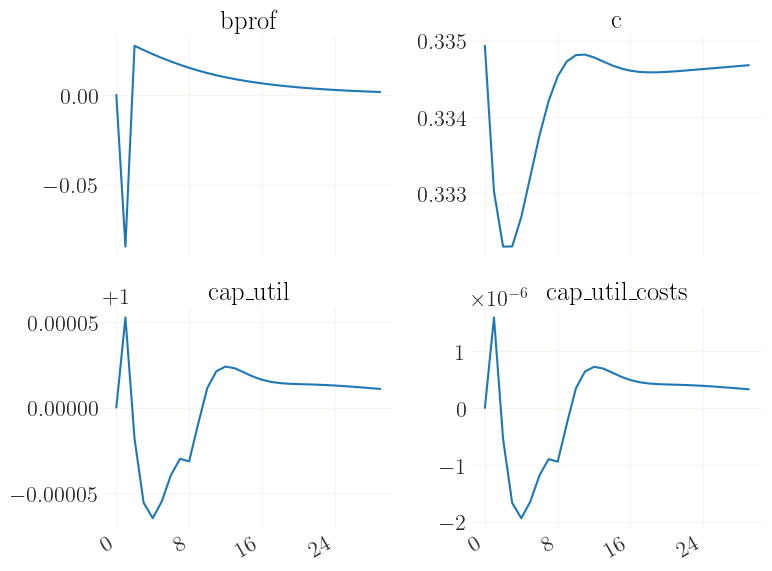

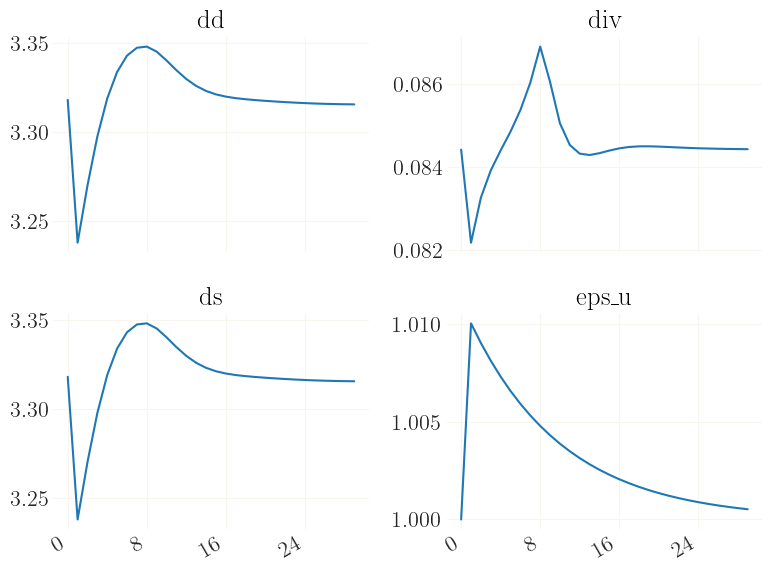

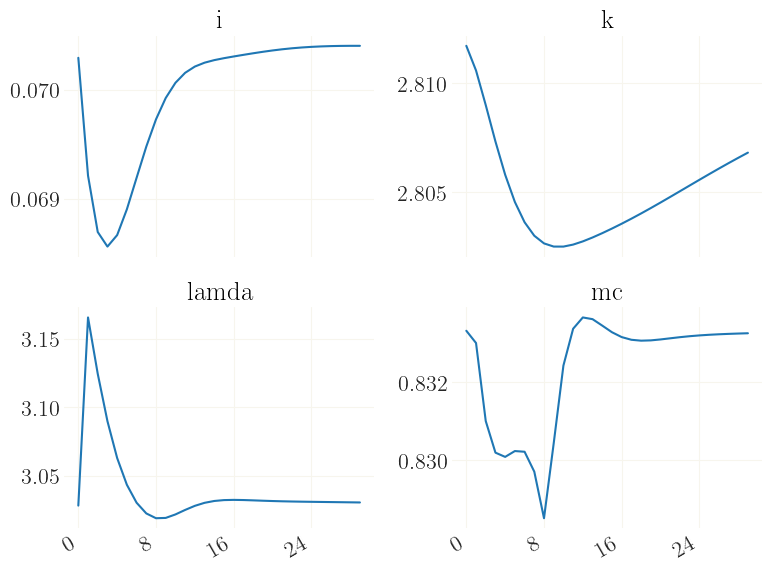

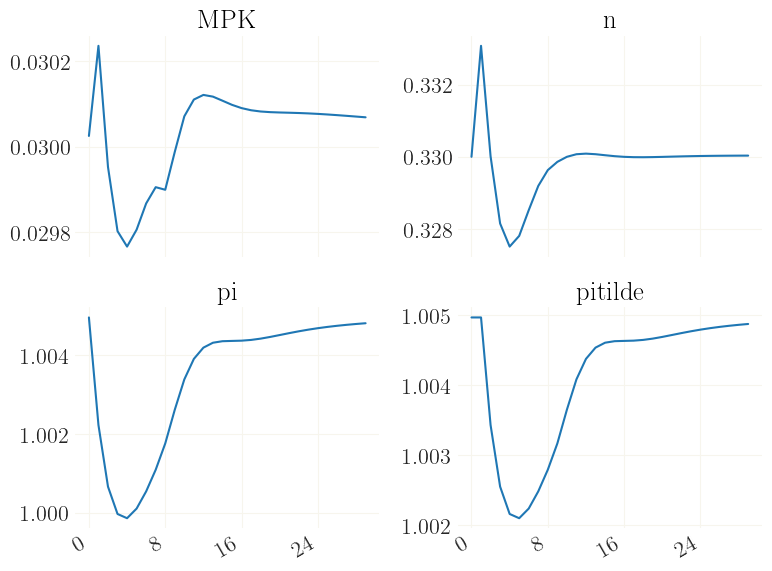

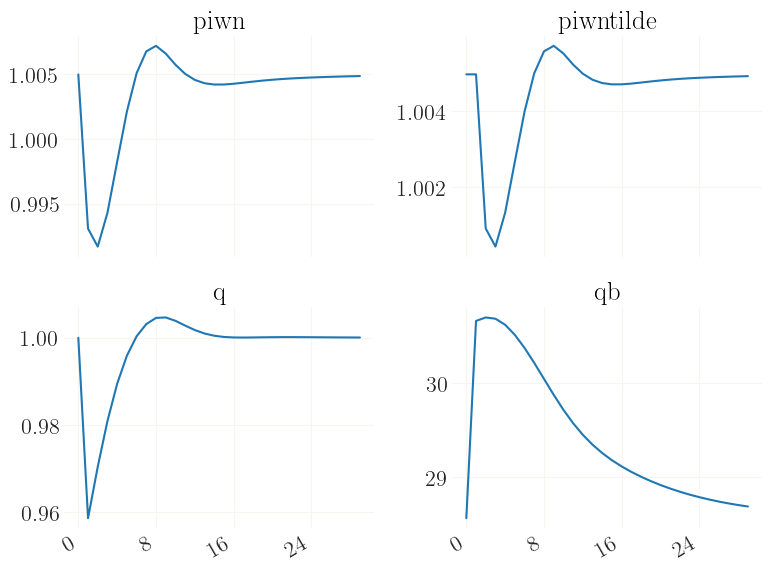

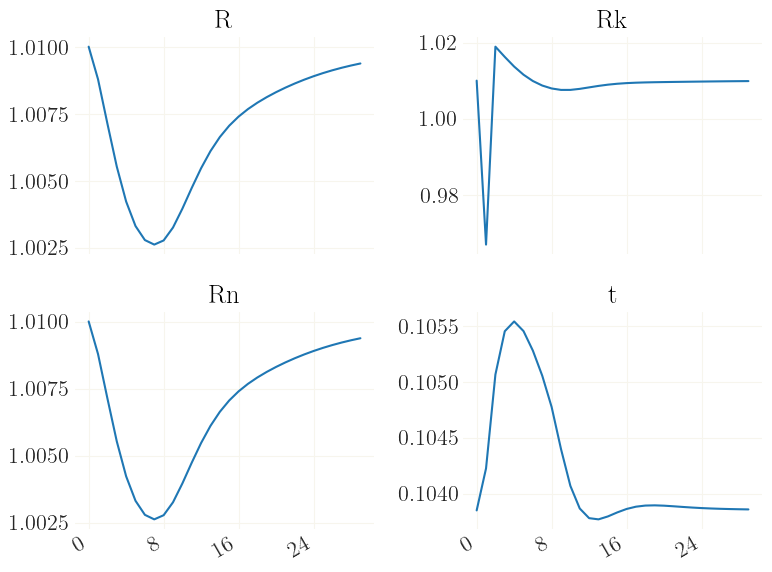

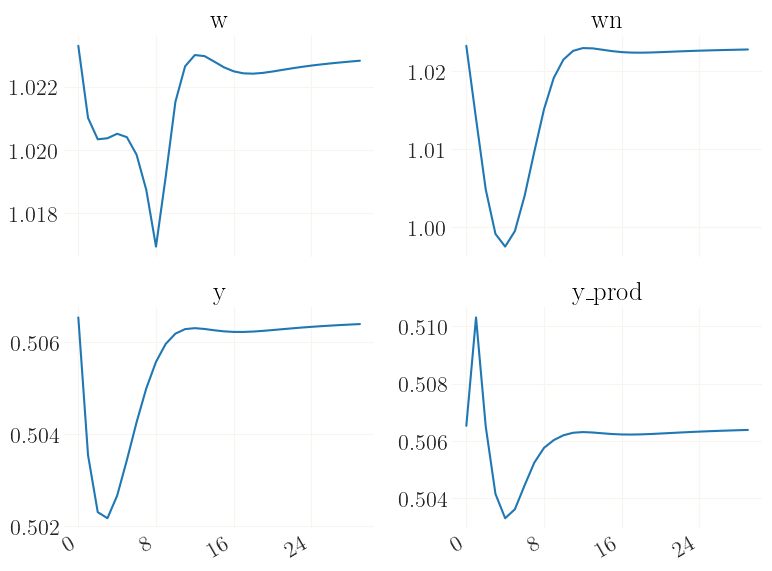

In [14]:
_ = grplot(x[:30], labels=mod['variables'])